##### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import parallel_coordinates
from pandas.plotting import andrews_curves
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import scipy as sp
from collections import Counter
from math import sqrt


##### Load DataSet

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.shape

(150, 6)

In [4]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

##### Dividing feature and labels

In [7]:
feature_columns=['SepalWidthCm', 'PetalLengthCm','PetalWidthCm']

In [8]:
X = df[feature_columns].values
y = df['Species'].values

##### Label Encoding

In [9]:
lr = LabelEncoder()
y = lr.fit_transform(y)

##### Split Dataset into Training set and Test set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0)

##### Data Visualization

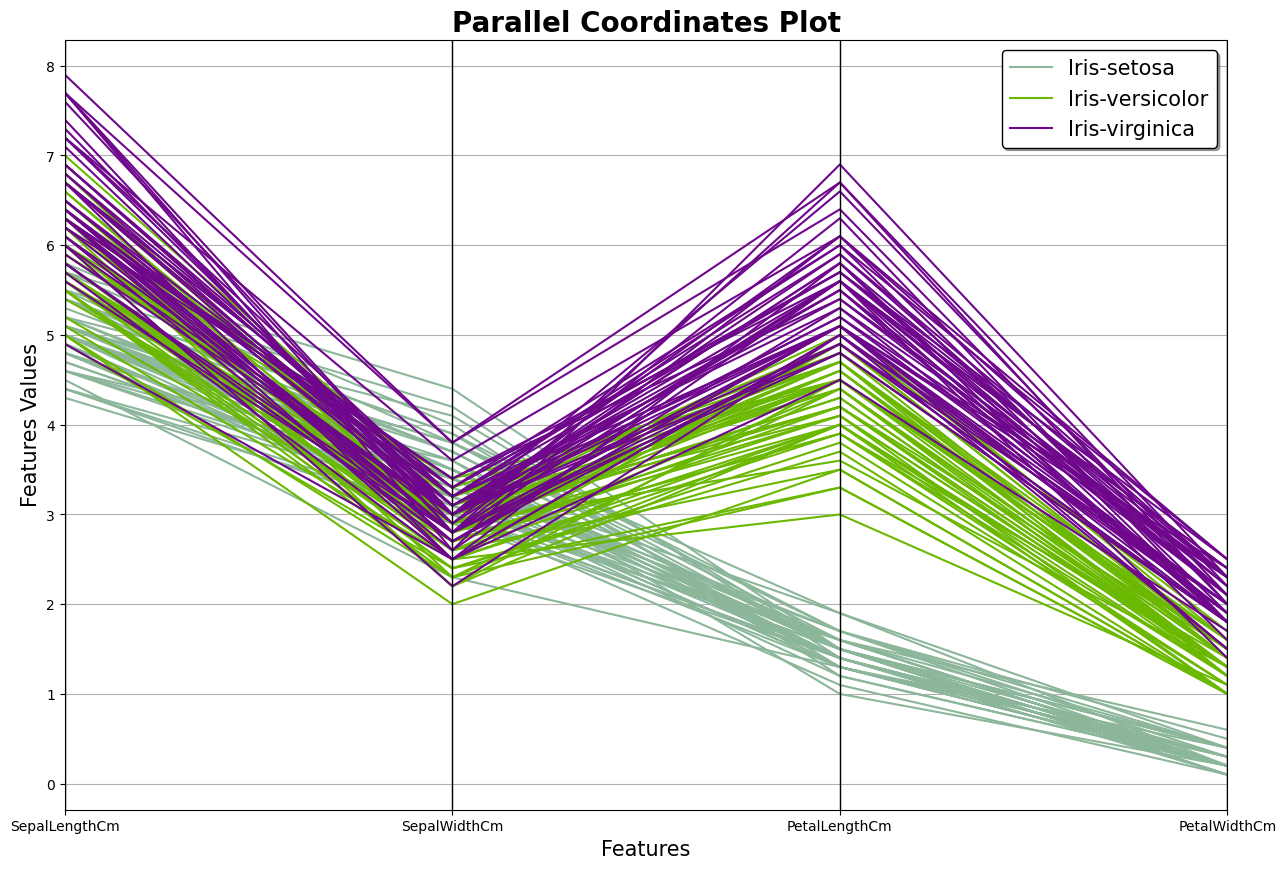

In [11]:
plt.figure(figsize=(15, 10))
parallel_coordinates(df.drop("Id", axis=1), "Species")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Features Values', fontsize = 15)
plt.legend(loc=1, prop={'size':15}, frameon = True, shadow = True, facecolor="white", edgecolor="black")
plt.show()

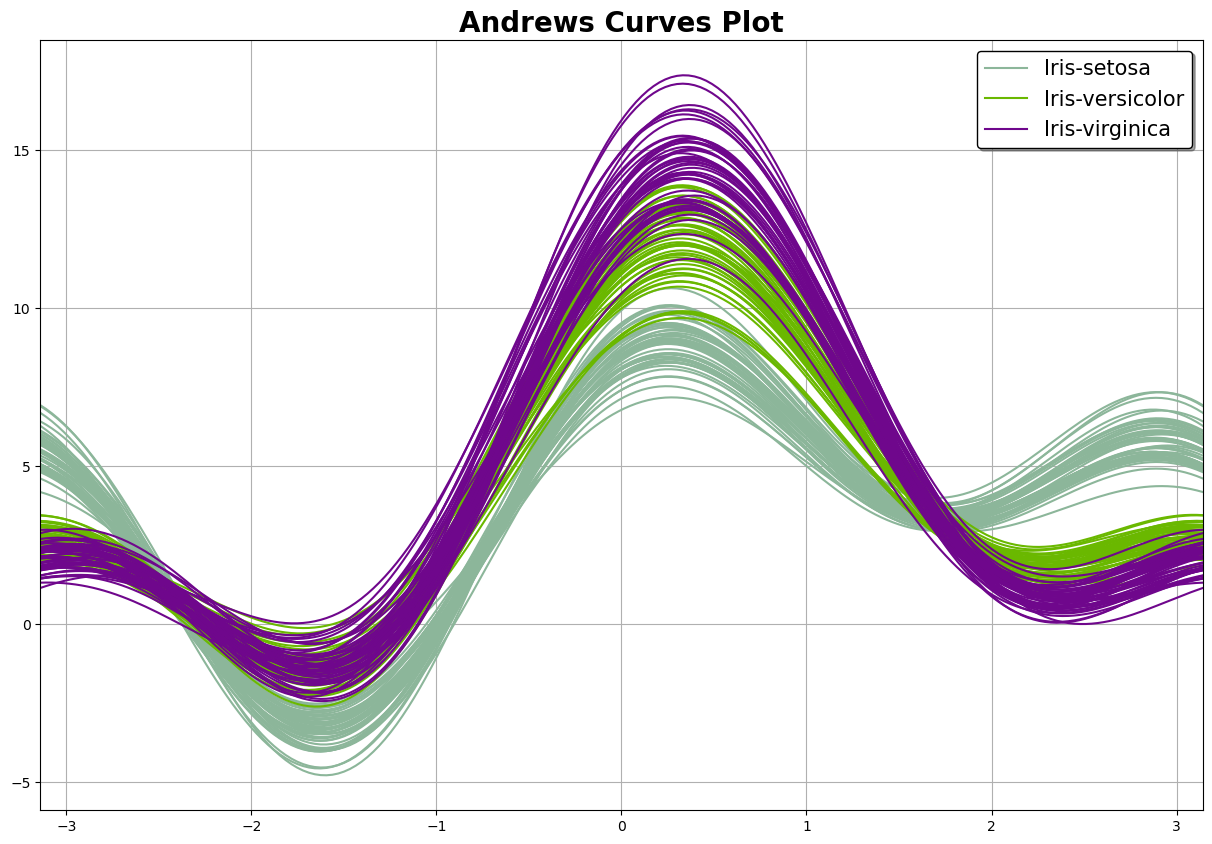

In [12]:
plt.figure(figsize=(15,10))
andrews_curves(df.drop("Id", axis=1), "Species")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

<Figure size 640x480 with 0 Axes>

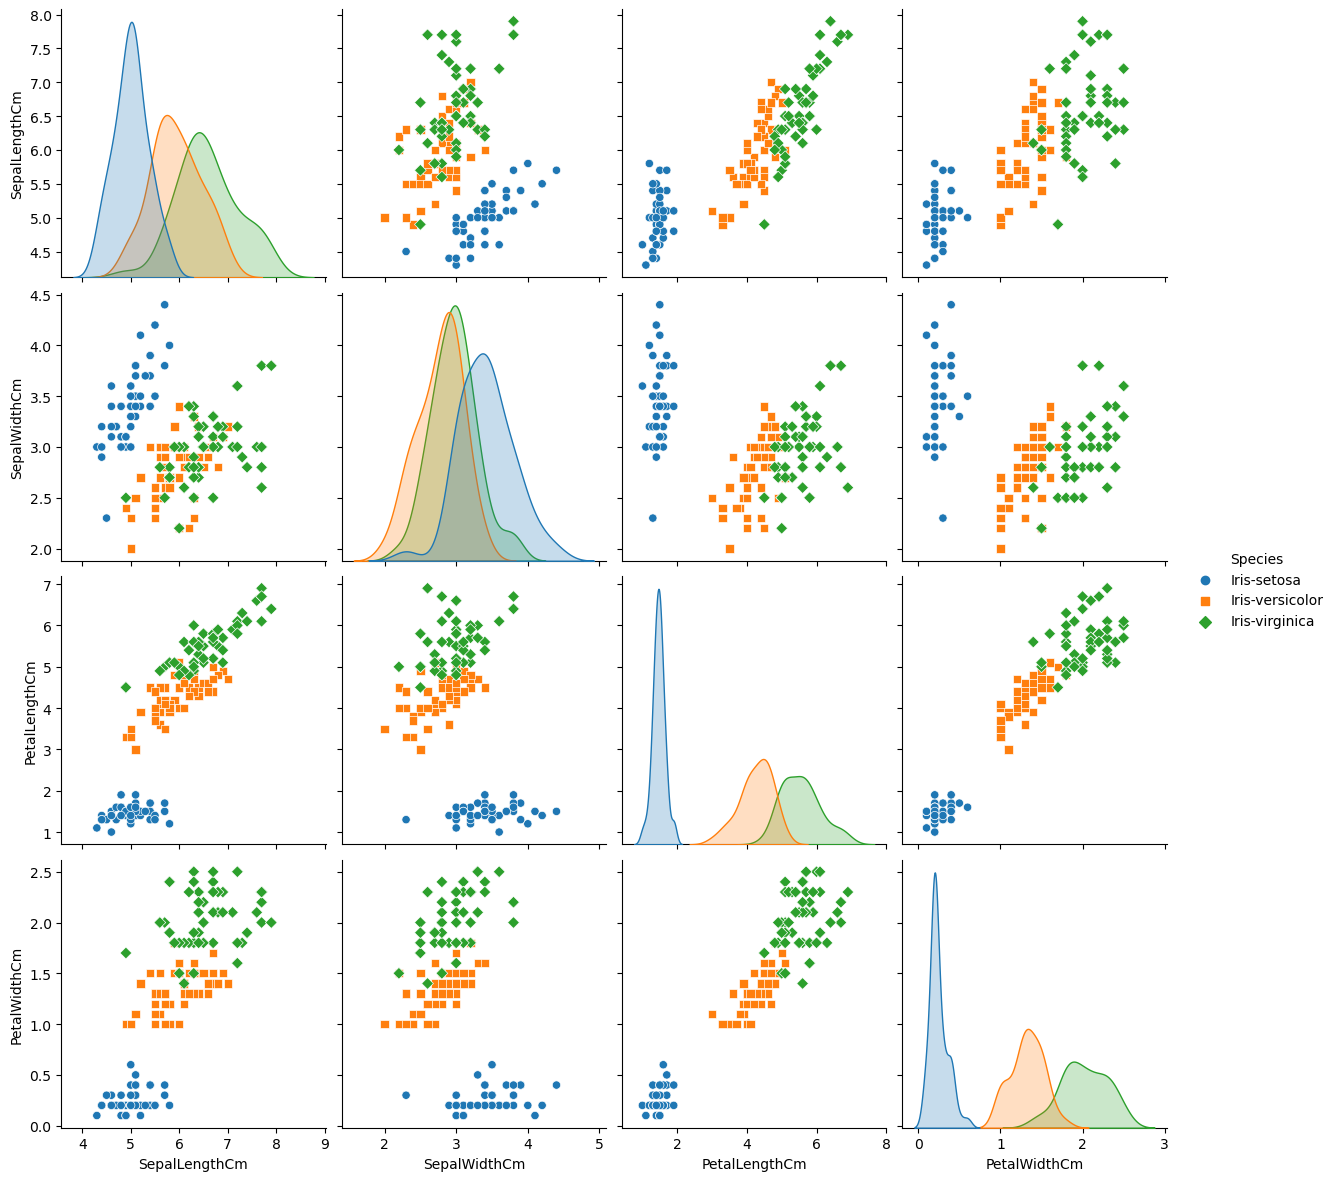

In [13]:
plt.figure()
sns.pairplot(df.drop("Id", axis=1), hue="Species", height=3, markers=["o", "s", "D"])
plt.show()

<Figure size 640x480 with 0 Axes>

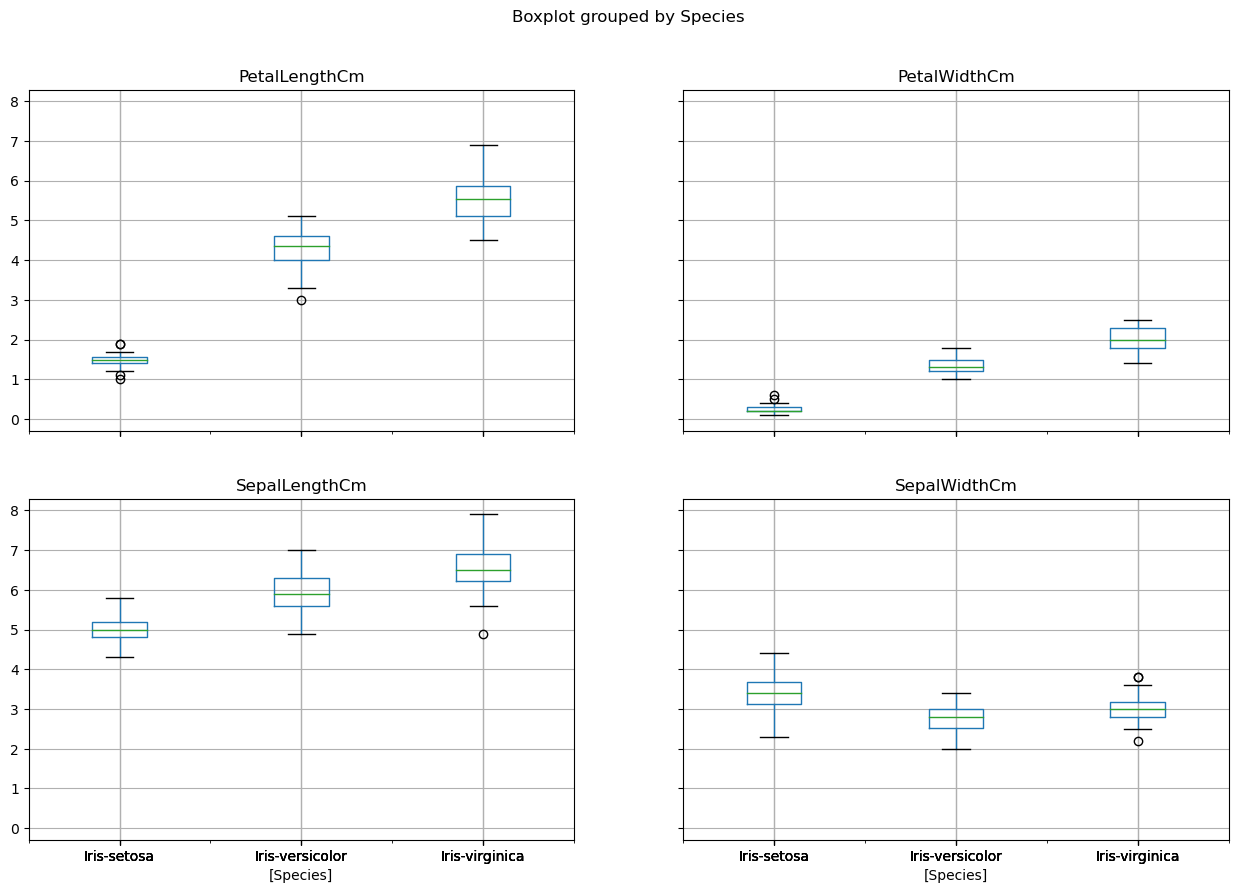

In [14]:
plt.figure()
df.drop("Id", axis=1).boxplot(by="Species", figsize=(15, 10))
plt.show()

##### KNN for Classification

In [15]:
classifier = KNeighborsClassifier(n_neighbors=3)

In [16]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [19]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 100.0 %.


In [20]:
k_list = list(range(1,50,2))

In [21]:
cv_scores = []

In [22]:
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 640x480 with 0 Axes>

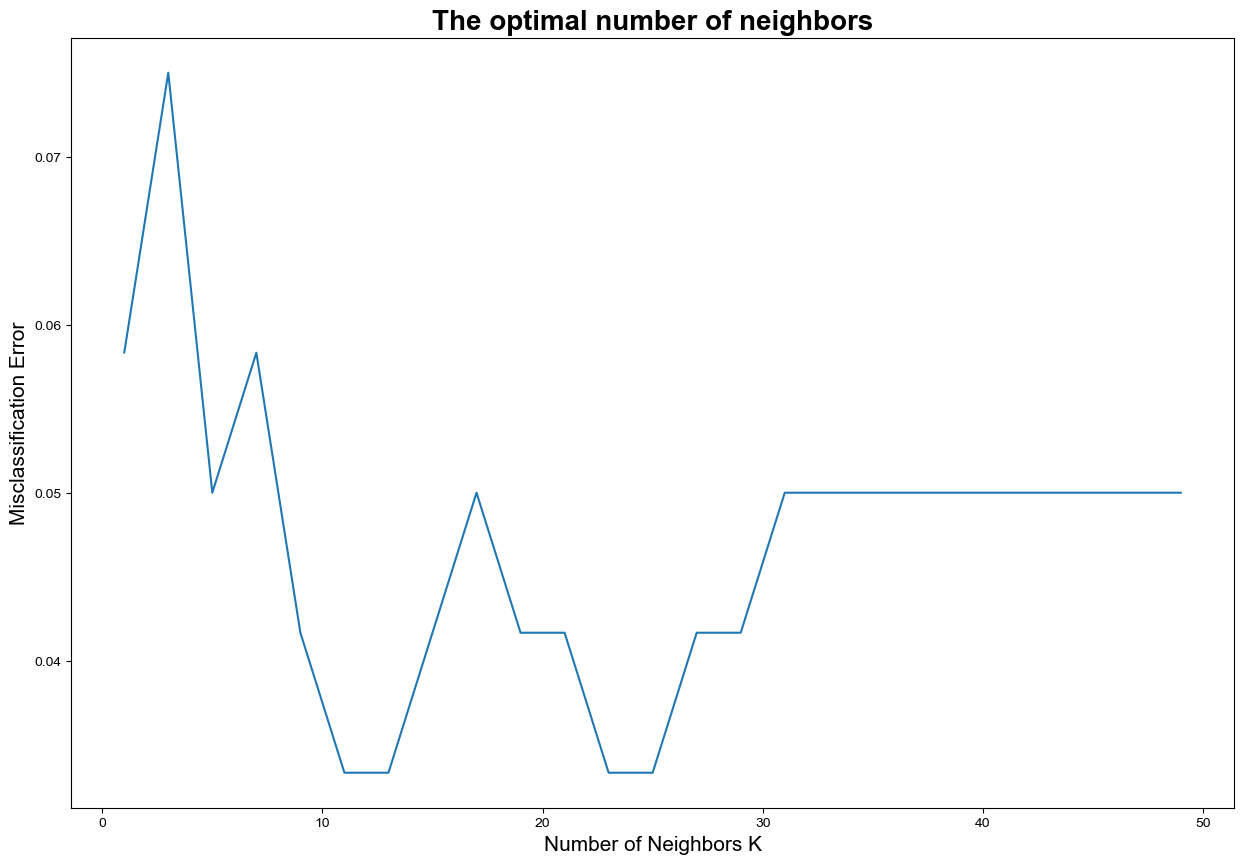

In [23]:
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [24]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 11.


In [25]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            neighbors = self._get_neighbors(x)
            most_common_label = self._get_most_common_label(neighbors)
            predictions.append(most_common_label)
        return predictions

    def _get_neighbors(self, x):
        distances = []
        for i, x_train in enumerate(self.X_train):
            dist = self._euclidean_distance(x, x_train)
            distances.append((i, dist))
        distances.sort(key=lambda x: x[1])
        return distances[:self.k]

    def _get_most_common_label(self, neighbors):
        labels = [self.y_train[i] for i, _ in neighbors]
        label_count = Counter(labels)
        most_common_label = label_count.most_common(1)[0][0]
        return most_common_label

    def _euclidean_distance(self, x1, x2):
        distance = 0
        for i in range(len(x1)):
            distance += (x1[i] - x2[i]) ** 2
        return sqrt(distance)


In [26]:
my_classifier = KNN(k=3)

In [27]:
my_classifier.fit(X_train, y_train)

In [28]:
my_y_pred = my_classifier.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, my_y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 100.0 %.
